# Prac 07.2

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [20]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

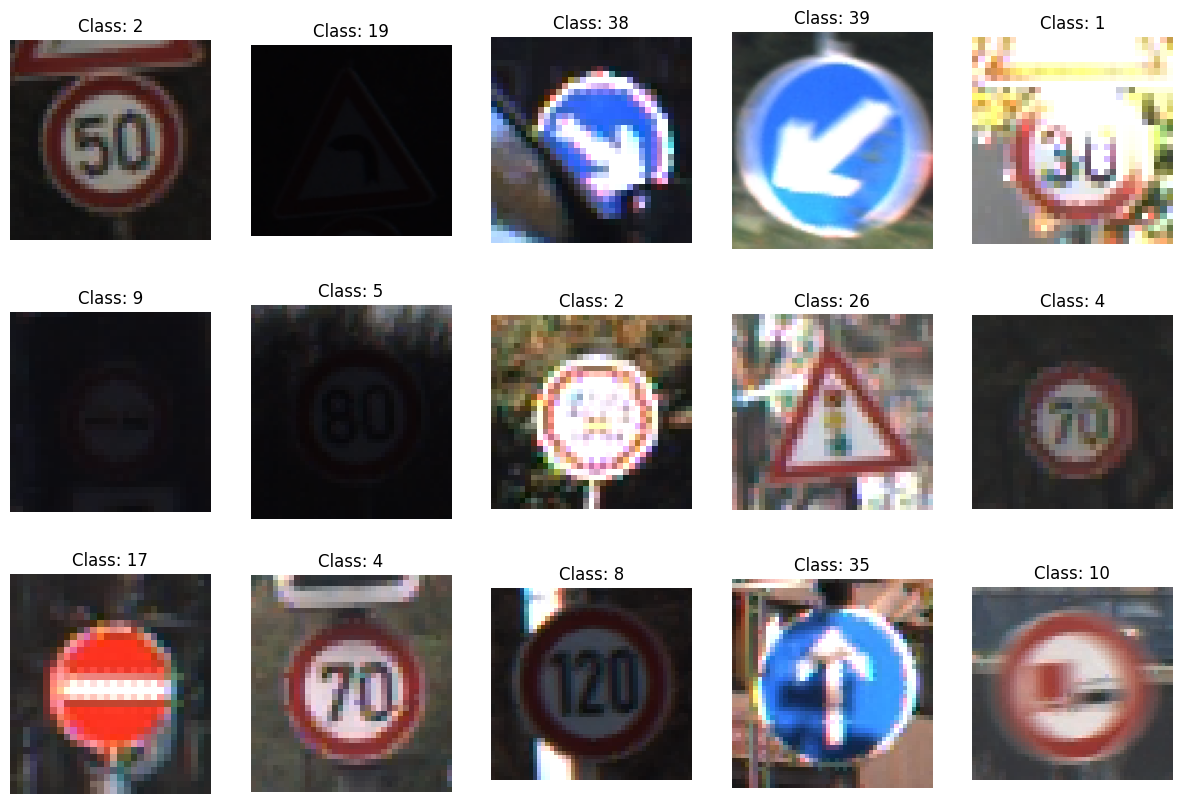

In [21]:
# Load the training labels
root = 'archive'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)

    # Load image
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img = cv2.imread(img_path)

    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image
    plt.subplot(3, 5, ii + 1)
    plt.imshow(img)
    plt.title(f"Class: {data.iloc[idx]['ClassId']}")
    plt.axis('off')

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [22]:
ids = data['ClassId'].values

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

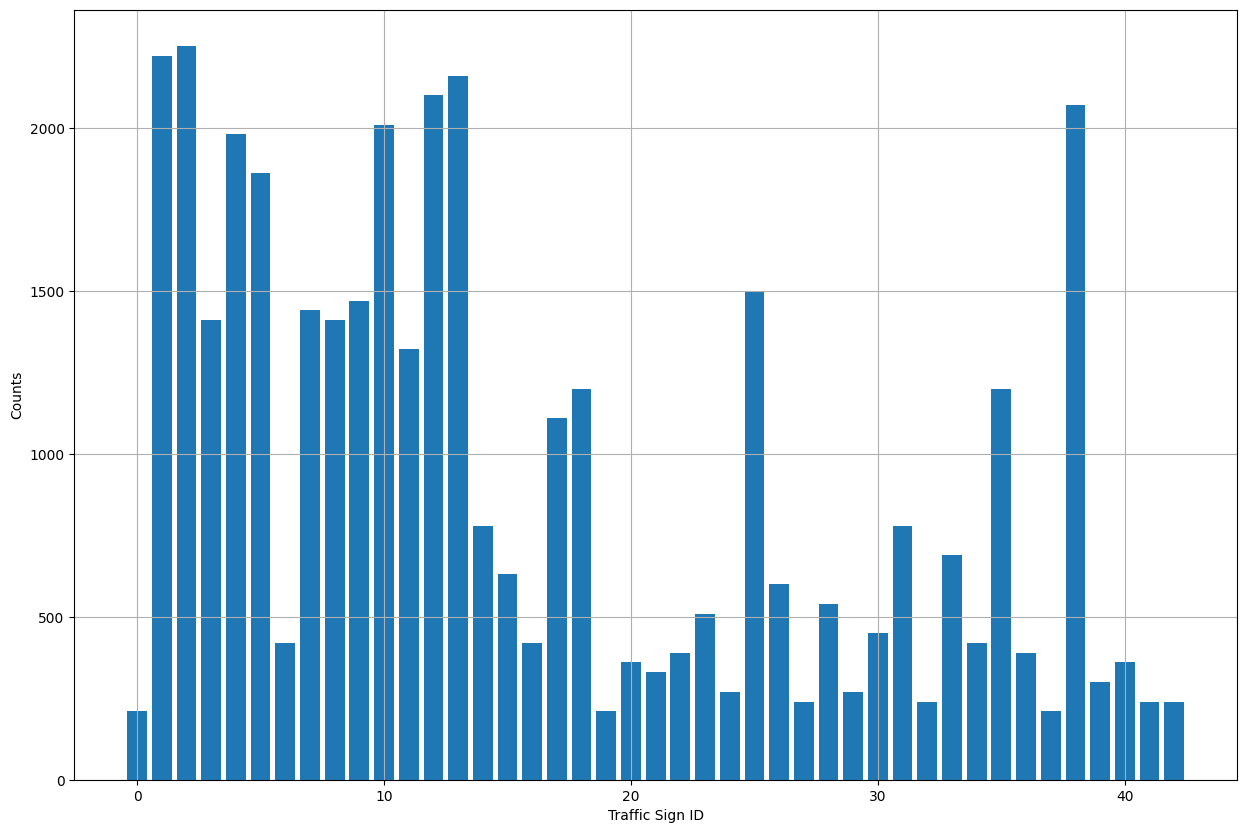

In [23]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why? -ні, на гістограмі, можна побачити значну різницю між кількістю зображень для різних класів
* Are there any classes that are (significantly) over-represented or under-represeneted? - так

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

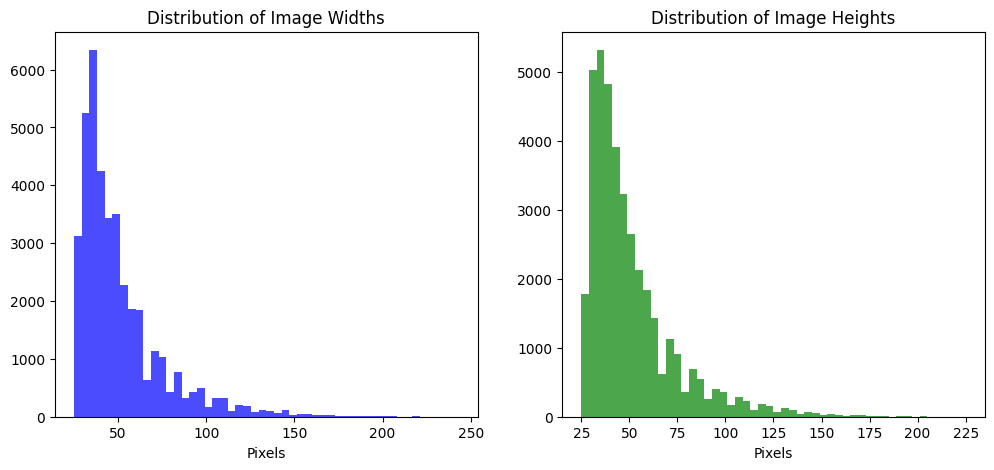

Min size: 25x25
Max size: 243x225


In [24]:
widths = data['Width']
heights = data['Height']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Pixels')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='green', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Pixels')

plt.show()

print(f"Min size: {widths.min()}x{heights.min()}")
print(f"Max size: {widths.max()}x{heights.max()}")

In [25]:
import seaborn as sns
def calculate_brightness(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return np.mean(gray)

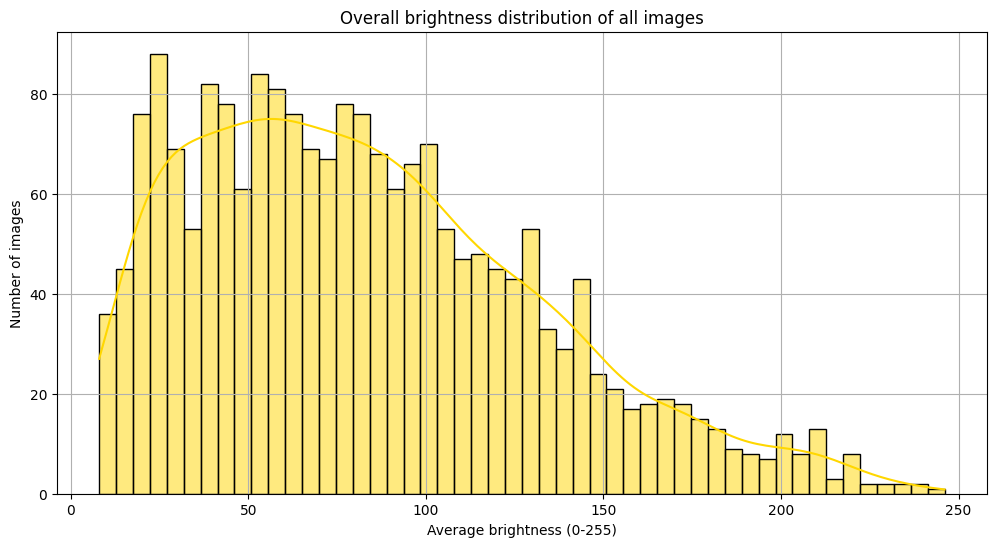

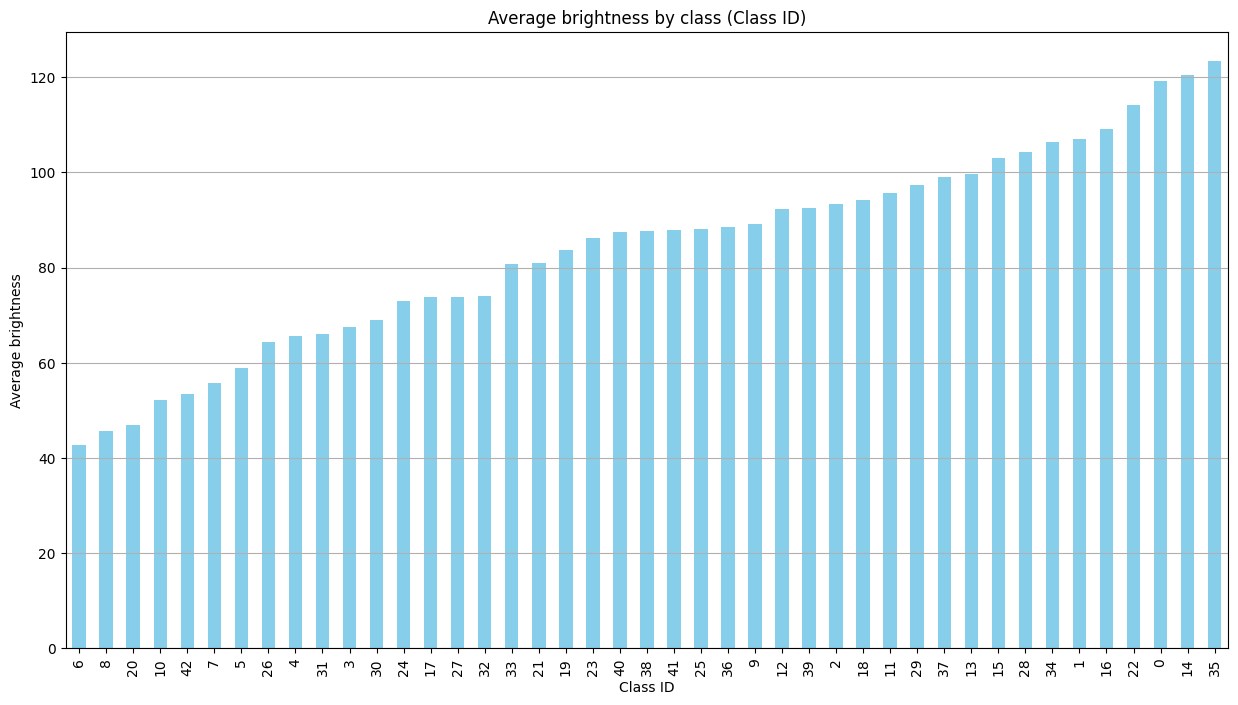

Class with the lowest average brightness: 6
Class with the highest average brightness: 35


In [26]:
data = data.sample(2000)
data['brightness'] = data['Path'].apply(lambda x: calculate_brightness(os.path.join(root, x)))

data = data.dropna(subset=['brightness'])

plt.figure(figsize=(12, 6))
sns.histplot(data['brightness'], bins=50, kde=True, color='gold')
plt.title('Overall brightness distribution of all images')
plt.xlabel('Average brightness (0-255)')
plt.ylabel('Number of images')
plt.grid(True)
plt.show()

class_brightness = data.groupby('ClassId')['brightness'].mean().sort_values()

plt.figure(figsize=(15, 8))
class_brightness.plot(kind='bar', color='skyblue')
plt.title('Average brightness by class (Class ID)')
plt.xlabel('Class ID')
plt.ylabel('Average brightness')
plt.grid(axis='y')
plt.show()

print(f"Class with the lowest average brightness: {class_brightness.idxmin()}")
print(f"Class with the highest average brightness: {class_brightness.idxmax()}")

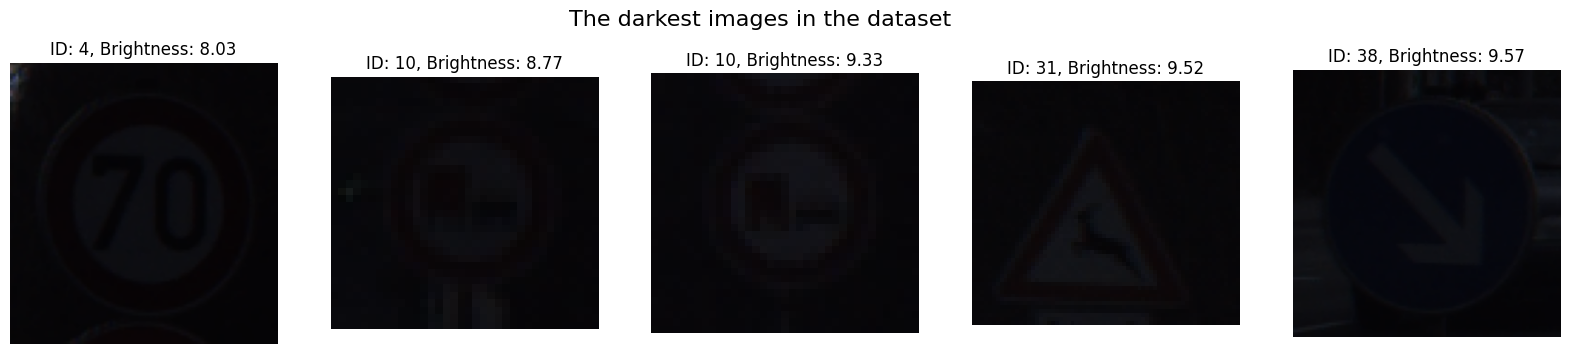

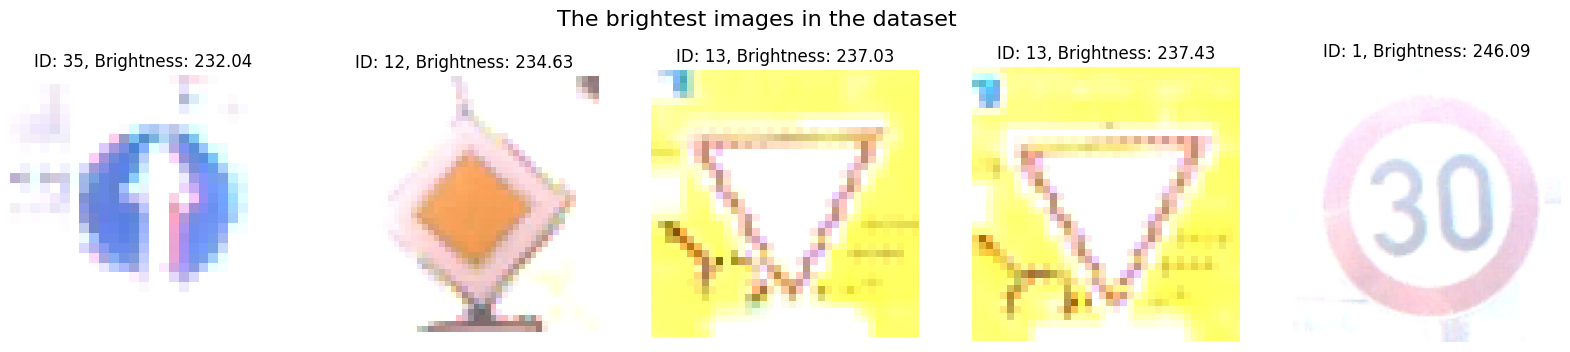

In [27]:
import matplotlib.pyplot as plt
import cv2
import os

sorted_data = data.sort_values(by='brightness')

darkest = sorted_data.head(5)
brightest = sorted_data.tail(5)

def plot_samples(samples_df, title):
    plt.figure(figsize=(20, 4))
    for i, (idx, row) in enumerate(samples_df.iterrows()):
        img_path = os.path.join(root, row['Path'])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"ID: {row['ClassId']}, Brightness: {row['brightness']:.2f}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

plot_samples(darkest, "The darkest images in the dataset")
plot_samples(brightest, "The brightest images in the dataset ")